In [4]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# load de dataframe
# raw_dataset = pd.read_csv("../data/clean_df.csv")
raw_dataset = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")

# select objetives columns
raw_dataset = raw_dataset.loc[:, ['highway-mpg', 'price']]
# copy dataset
dataset = raw_dataset.copy()
# clean nan values
dataset = dataset.dropna()
# sample train dataset
train_dataset = dataset.sample(frac=0.8, random_state=1)
# sample test dataset
test_dataset = dataset.drop(train_dataset.index)

# features (independent variables)
train_features = train_dataset.copy()
test_features = test_dataset.copy()
# labels (dependet variable)
train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [ ]:
# Polynomial regression is a particular case of the general linear regression 
# model or multiple linear regression models.

# We get non-linear relationships by squaring or setting higher-order 
# terms of the predictor variables.

# There are different orders of polynomial regression:

# Quadratic - 2nd order
# yhat = a + b1x + b2x^2

# Cubic - 2nd order
# yhat = a + b1x + b2x^2 + b3x^3

# Higher - Order
# yhat = a + b1x + b2x^2 + b3x^3 ...

In [1]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [22]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(train_features["highway-mpg"], train_labels, 3)
p = np.poly1d(f)
print(p)

        3       2
-1.223 x + 169 x - 7775 x + 1.257e+05


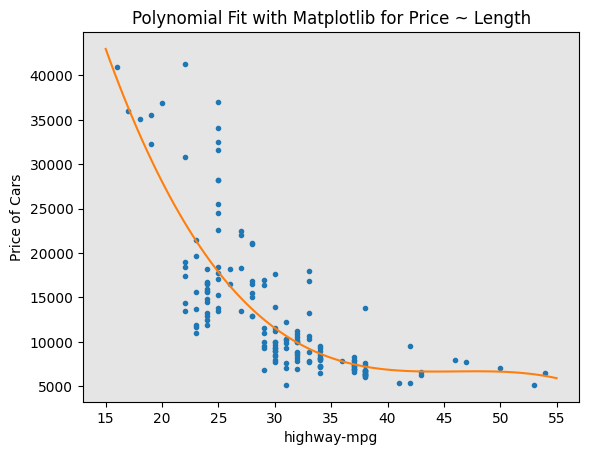

In [23]:
PlotPolly(p, train_features["highway-mpg"], train_labels, 'highway-mpg')

            11             10            9          8        7
-1.712e-08 x  + 6.494e-06 x  - 0.001102 x + 0.1104 x - 7.24 x
          6             5             4             3             2
 + 326.5 x - 1.032e+04 x + 2.285e+05 x - 3.471e+06 x + 3.442e+07 x - 2.005e+08 x + 5.199e+08


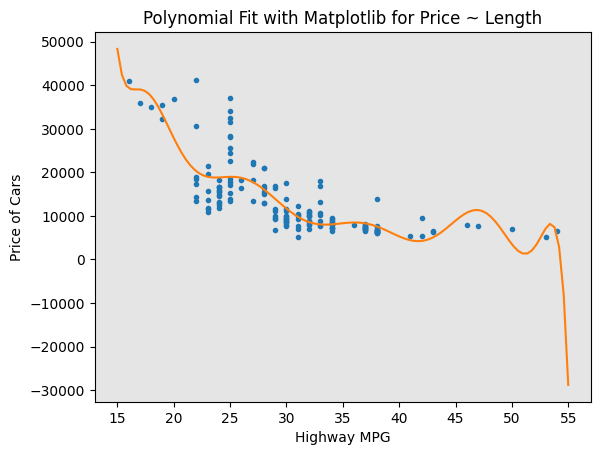

In [31]:
f1 = np.polyfit(train_features["highway-mpg"], train_labels, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,train_features["highway-mpg"], train_labels, 'Highway MPG')

In [36]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr
Z_pr=pr.fit_transform(train_features)
Z_pr.shape

(161, 3)

In [72]:
# pipeline

# Data Pipelines simplify the steps of processing the data. We use the module 
# Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# We create the pipeline by creating a list of tuples including the name of the model 
# or estimator and its corresponding constructor.

Input=[('scale',StandardScaler()), 
       ('polynomial', PolynomialFeatures(include_bias=False)), 
       ('model',LinearRegression())]

# We input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

# First, we convert the data type Z to type float to avoid conversion 
# warnings that may appear as a result of StandardScaler taking float inputs.

# Then, we can normalize the data, perform a transform and fit the model simultaneously.

Z = train_features.astype(float)
pipe.fit(Z, train_labels)

ypipe=pipe.predict(train_features)
ypipe[0:10]

array([ 8472.14425169,  6224.4837548 , 10098.56185202,  8472.14425169,
       12060.03768694,  6224.4837548 , 19954.81459924, 10098.56185202,
       23256.52337252,  5299.61070326])